# Problem statement 
To develop a machine learning model capable of predicting the groundwater potential of aquifers, quantified on a scale of 0 to 1, indicating the yield of an aquifer.

### Background and Rationale
- Transmissivity: Defined as the measure of the ease of groundwater flow through an aquifer, calculated by multiplying the hydraulic conductivity by the thickness of the aquifer. This metric serves as a comprehensive indicator of water flow ease, rendering hydraulic conductivity as a feature is redundant when transmissivity is available.
- The following features are what are considered in predicting aquifer storage in this project. 
    - Aquifer thickness 
    - Transimisivity  
    - hydraulic conductivy 
    - Fracture contrast 
    - Transverse resistance 
    - longitudinal conductance 
    - Overburden thickness 
    - aquifer resistivity 
    - Reflection co-efficient



## Import and Explore data 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import StandardScaler


In [2]:
# Settings
pd.set_option('display.max_columns', None)

In [3]:
# load up the datasets
df_1 = pd.read_excel("data/dataset_2.xlsx")
df_1.head()

,VES S/N,Easting (Min),Northing (Min),Elev(m),No. of Layer,Curve Types,Thickness Topsoil h1(m),Thickness Laterite h2(m),Thickness weathered h3 (m),Corrected Thick. weathered (m) H3,Thickness Fractured h4 (m),Corrected Thick. Fractured (m) H4,Thick. Overb.\nB1=h1+h2,Total Aquifer Thick. B2=h3+h4,Corrected Total Aquifer Thick,p1,p2,p3,p4,p5,Res. Of Topsoil,Res. Of Laterite,Long. Cond. (mhos) Topsoil,Long. Cond. (mhos) Laterite,Long. Cond. (mhos) OVERBURRDEN,Logarithm of Topsoil,RESISTIVITY OF FRESH BASEMENT,Logarithm Fresh Basement,AQUIFER RES of Weathered. \n(Ohm-M),Logarithm Weathered,Hydraulic Conductivity (K),Transmissivity (T),Wrong,Aquifer storage
0,1,36.94,28.00,343.0,4,KH,1.1,4.9,23.4,25.0146,0.0,0.0,6.0,23.4,25.0146,128.3,213.0,52.7,137.7,NaN,128.3,213.0,0.008574,0.023005,0.031578,2.108227,137.7,2.138934,52.7,1.721811,9.569308,239.372406,248.941713,30.01752
1,2,36.73,28.80,359.0,4,KH,0.8,1.6,22.7,24.2663,0.0,0.0,2.4,22.7,24.2663,518.0,583.0,252.0,752.0,NaN,518.0,518.0,0.001544,0.003089,0.004633,2.714330,752.0,2.876218,252.0,2.401401,2.222996,53.943884,56.166880,29.11956
2,3,36.60,28.75,397.0,3,A,0.8,0.0,9.5,10.1555,0.0,0.0,0.8,9.5,10.1555,12.4,68.0,385.6,NaN,NaN,12.4,0.0,0.064516,0.000000,0.064516,1.093422,385.6,2.586137,68.0,1.832509,7.544281,76.615941,84.160221,12.18660
3,4,36.84,29.58,342.0,3,H,0.9,0.0,6.7,7.1623,0.0,0.0,0.9,6.7,7.1623,309.8,174.1,3533.3,NaN,NaN,309.8,0.0,0.002905,0.000000,0.002905,2.491081,3533.3,3.548181,174.1,2.240799,3.138722,22.480466,25.619188,8.59476
4,5,36.60,29.54,348.0,3,H,2.5,0.0,62.2,66.4918,0.0,0.0,2.5,62.2,66.4918,1303.7,292.7,940.5,NaN,NaN,1303.7,0.0,0.001918,0.000000,0.001918,3.115178,940.5,2.973359,292.7,2.466423,1.933232,128.544086,130.477318,79.79016


In [4]:
df_1.columns

Index(['VES S/N', 'Easting (Min)', 'Northing (Min)', 'Elev(m)', 'No. of Layer',
       'Curve Types', 'Thickness Topsoil h1(m)', 'Thickness Laterite h2(m)',
       'Thickness weathered h3 (m)', 'Corrected Thick. weathered (m) H3',
       'Thickness Fractured h4 (m)', 'Corrected Thick. Fractured (m) H4',
       'Thick. Overb.\nB1=h1+h2', 'Total Aquifer Thick. B2=h3+h4',
       'Corrected Total Aquifer Thick', 'p1', 'p2', 'p3', 'p4', 'p5',
       'Res. Of Topsoil', 'Res. Of Laterite', 'Long. Cond. (mhos) Topsoil',
       'Long. Cond. (mhos) Laterite', 'Long. Cond. (mhos) OVERBURRDEN',
       'Logarithm of Topsoil', 'RESISTIVITY OF FRESH BASEMENT',
       'Logarithm Fresh Basement', 'AQUIFER RES of Weathered. \n(Ohm-M)',
       'Logarithm Weathered', 'Hydraulic Conductivity (K)',
       'Transmissivity (T)', 'Wrong', 'Aquifer storage '],
      dtype='object')

In [5]:
df_1.describe()

,VES S/N,Easting (Min),Northing (Min),Elev(m),No. of Layer,Thickness Topsoil h1(m),Thickness Laterite h2(m),Thickness weathered h3 (m),Corrected Thick. weathered (m) H3,Thickness Fractured h4 (m),Corrected Thick. Fractured (m) H4,Thick. Overb.\nB1=h1+h2,Total Aquifer Thick. B2=h3+h4,Corrected Total Aquifer Thick,p1,p2,p3,p4,p5,Res. Of Topsoil,Res. Of Laterite,Long. Cond. (mhos) Topsoil,Long. Cond. (mhos) Laterite,Long. Cond. (mhos) OVERBURRDEN,Logarithm of Topsoil,RESISTIVITY OF FRESH BASEMENT,Logarithm Fresh Basement,AQUIFER RES of Weathered. \n(Ohm-M),Logarithm Weathered,Hydraulic Conductivity (K),Transmissivity (T),Wrong,Aquifer storage
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,90.000000,4.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,127.000000,33.721700,30.040079,329.477075,3.379447,2.248221,2.306719,17.458933,18.663599,0.300000,0.320700,4.554941,17.758933,18.984299,250.245889,202.835217,744.699684,770.207778,600.425000,250.245889,148.566008,0.018907,0.035889,0.054795,2.206264,925.992569,2.626839,69.496838,1.646824,15.466097,309.277248,324.743345,22.452442
std,73.179004,2.190428,1.293328,56.739089,0.510109,2.456100,4.960430,9.286192,9.926939,2.507006,2.679989,5.303707,9.482269,10.136545,291.008500,434.231545,1632.989814,1048.339528,647.327142,291.008500,412.762340,0.033459,0.095306,0.099352,0.405398,1701.249064,0.525081,89.509370,0.393557,12.670806,389.271736,400.225146,11.895308
min,1.000000,29.340000,27.600000,143.000000,3.000000,0.300000,0.000000,2.400000,2.565600,0.000000,0.000000,0.400000,2.400000,2.565600,12.400000,4.600000,7.000000,25.200000,142.900000,12.400000,0.000000,0.000357,0.000000,0.000357,1.093422,25.200000,1.401401,4.600000,0.662758,0.653645,6.205594,8.624363,3.078720
25%,64.000000,32.060000,29.050000,305.000000,3.000000,1.000000,0.000000,10.100000,10.796900,0.000000,0.000000,1.600000,10.600000,11.331400,88.700000,24.100000,108.700000,181.975000,198.625000,88.700000,0.000000,0.005006,0.000000,0.006945,1.947924,183.000000,2.262451,22.100000,1.344392,6.598510,90.143755,98.515853,12.956280
50%,127.000000,33.780000,29.950000,323.000000,3.000000,1.500000,0.000000,15.800000,16.890200,0.000000,0.000000,2.300000,16.500000,17.638500,157.300000,46.300000,284.500000,437.700000,357.400000,157.300000,0.000000,0.009756,0.000000,0.014885,2.196729,398.400000,2.600319,42.200000,1.625312,11.773265,186.331317,199.105235,20.268240
75%,190.000000,35.520000,30.820000,343.000000,4.000000,2.200000,2.500000,23.100000,24.693900,0.000000,0.000000,5.800000,23.400000,25.014600,284.200000,133.600000,682.700000,851.275000,759.200000,284.200000,56.800000,0.017544,0.011765,0.048458,2.453624,856.700000,2.932829,78.500000,1.894870,21.525224,362.098841,380.277346,29.632680
max,253.000000,37.080000,33.540000,930.000000,5.000000,12.700000,39.900000,62.200000,66.491800,27.600000,29.504400,40.800000,62.200000,66.491800,2524.200000,3325.000000,17762.300000,6308.100000,1544.000000,2524.200000,3325.000000,0.317829,0.847826,0.861303,3.402124,17762.300000,4.249499,936.000000,2.971276,93.067217,3710.934310,3804.001527,79.790160


In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   VES S/N                             253 non-null    int64  
 1   Easting (Min)                       253 non-null    float64
 2   Northing (Min)                      253 non-null    float64
 3   Elev(m)                             253 non-null    float64
 4   No. of Layer                        253 non-null    int64  
 5   Curve Types                         252 non-null    object 
 6   Thickness Topsoil h1(m)             253 non-null    float64
 7   Thickness Laterite h2(m)            253 non-null    float64
 8   Thickness weathered h3 (m)          253 non-null    float64
 9   Corrected Thick. weathered (m) H3   253 non-null    float64
 10  Thickness Fractured h4 (m)          253 non-null    float64
 11  Corrected Thick. Fractured (m) H4   253 non-n

## Insights from description and info 

- The average value for aquifer storage is found to be 22.4. According to the literature, it is recommended that an aquifer storage exceeding 60 percent is indicative of a good water-bearing capacity. This recommendation is from W.O. Raji and K.A. Abdulkadir in their 2020 study.
- Most of the values we want to use for the study are not null


### Visualizations 

 Plot data to visualize similarities between the features if any 



#### Assumptions:

1. Easting: Represents longitude values. (X axis )
2. Northing: Represents latitude values. (Y axis )



In [7]:
cols_to_plot = [
      'Thickness Topsoil h1(m)', 'Thickness Laterite h2(m)',
       'Thickness weathered h3 (m)',
       'Thickness Fractured h4 (m)', 
       'Thick. Overb.\nB1=h1+h2', 'Total Aquifer Thick. B2=h3+h4',
       'Corrected Total Aquifer Thick',
       'Res. Of Topsoil', 'Res. Of Laterite', 'Long. Cond. (mhos) Topsoil',
       'Long. Cond. (mhos) Laterite', 'Long. Cond. (mhos) OVERBURRDEN',
       'Logarithm of Topsoil', 'RESISTIVITY OF FRESH BASEMENT',
       'Logarithm Fresh Basement', 'AQUIFER RES of Weathered. \n(Ohm-M)',
       'Logarithm Weathered', 'Hydraulic Conductivity (K)',
       'Transmissivity (T)', 'Aquifer storage '
]


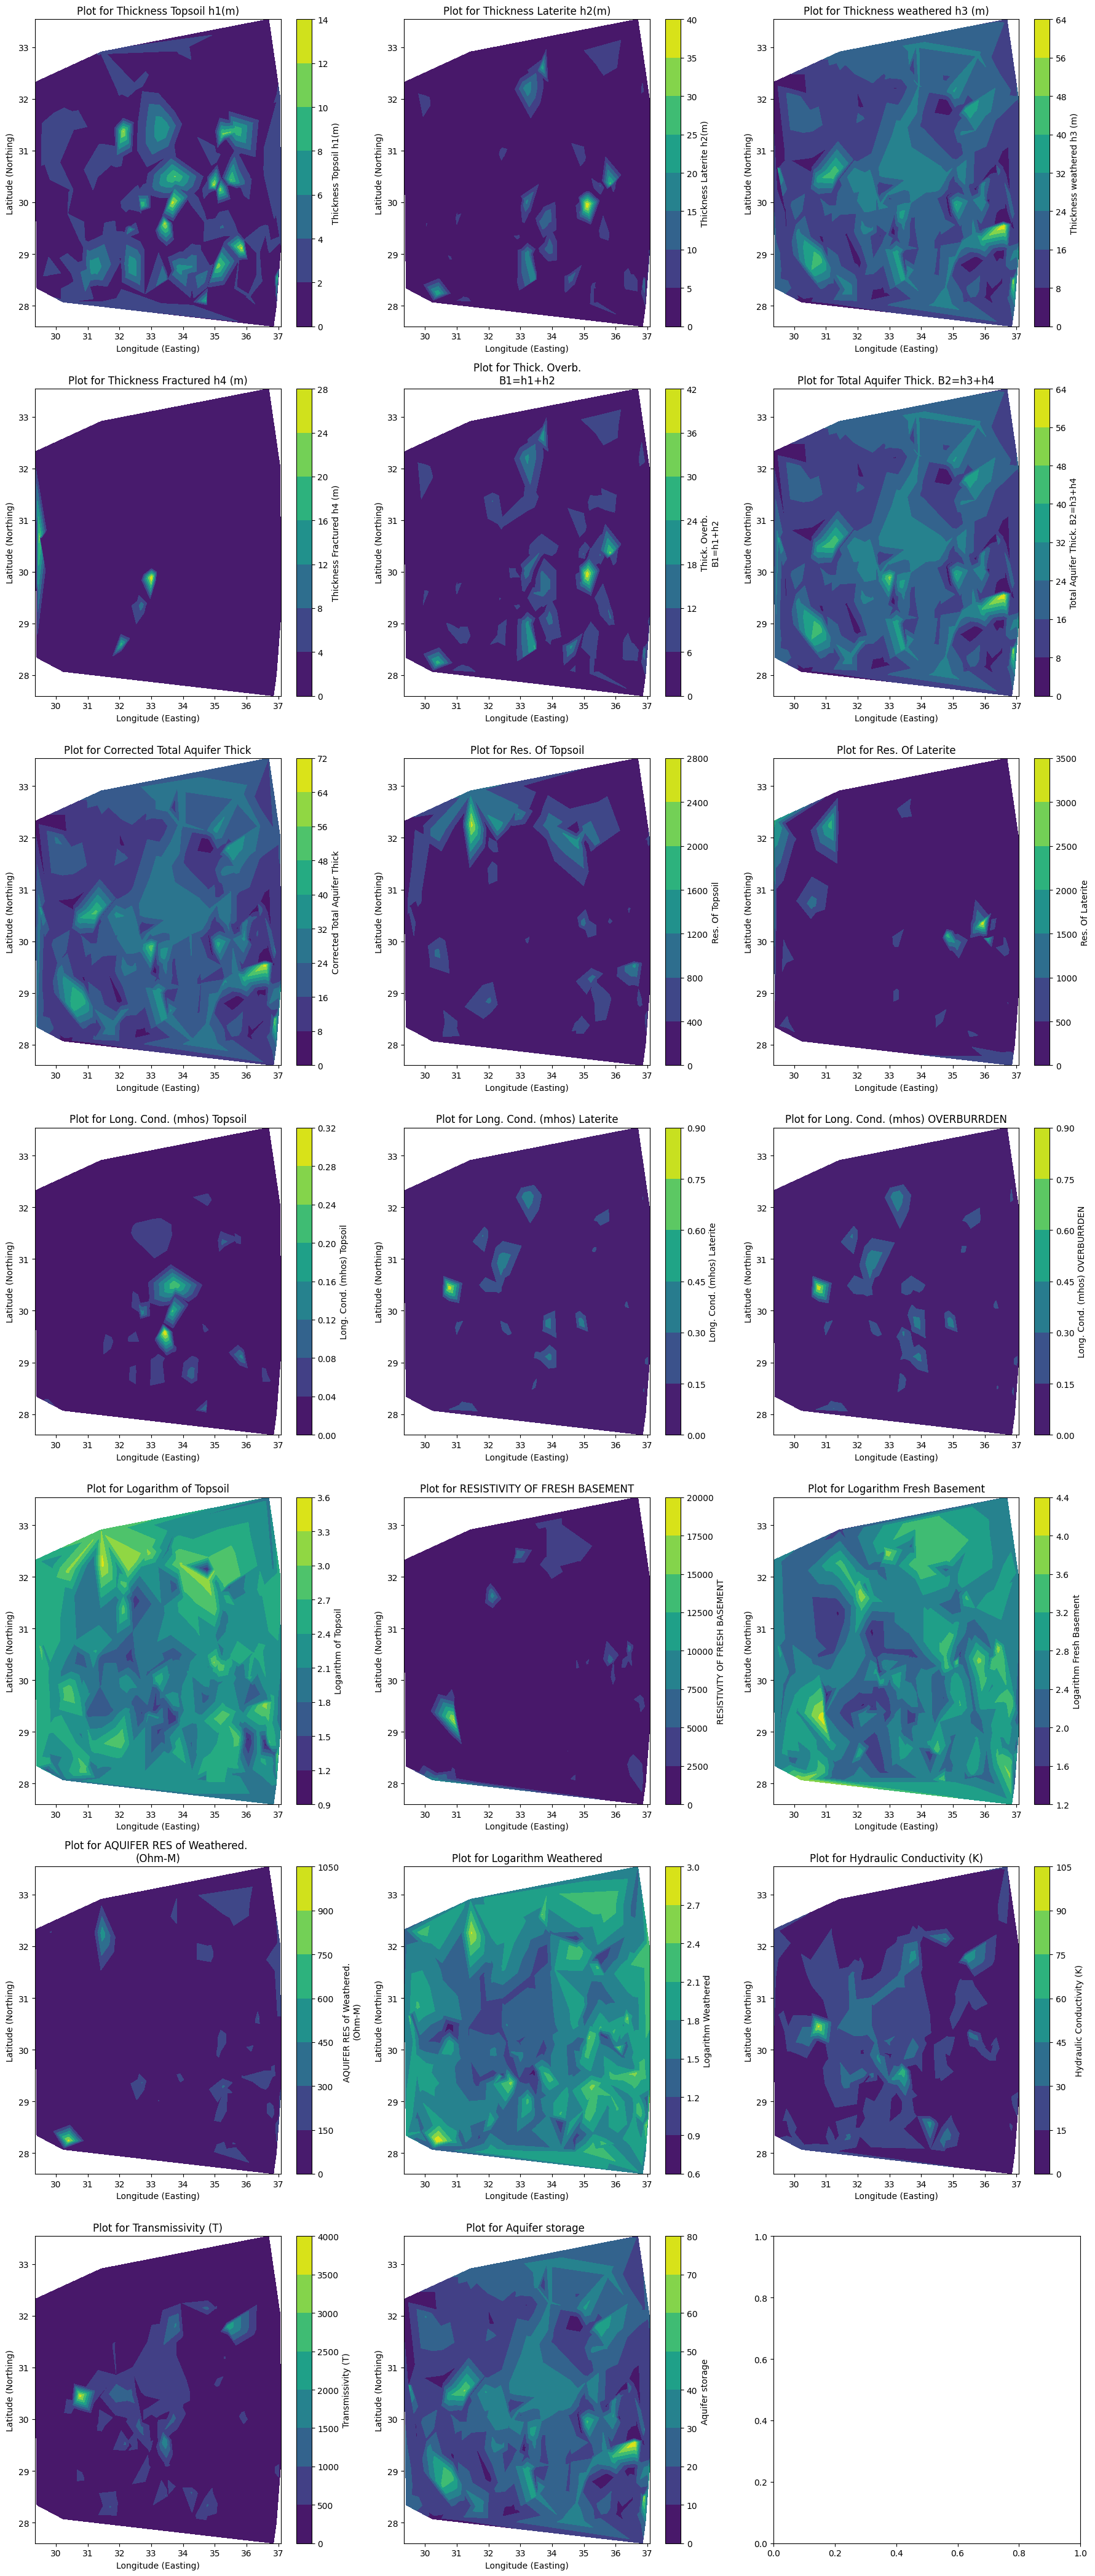

In [8]:
n_plots = len(cols_to_plot)
max_plots_per_row = 3

# Calculate nrows and ncols
ncols = min(n_plots, max_plots_per_row)
nrows = (n_plots + max_plots_per_row - 1) // max_plots_per_row  

# for plotting the data on the same image 
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*6), squeeze=False)  

for i, col in enumerate(cols_to_plot):
    # Calculate row and column index
    row = i // ncols
    col_idx = i % ncols

    ax = axs[row, col_idx]
    contour = ax.tricontourf(df_1['Easting (Min)'], df_1['Northing (Min)'], df_1[col])
    fig.colorbar(contour, ax=ax, label=col)
    ax.set_title(f'Plot for {col}')
    ax.set_xlabel('Longitude (Easting)')
    ax.set_ylabel('Latitude (Northing)')


plt.tight_layout()
plt.show()


In [11]:

def plot_features(df, cols_to_plot, scale_data=False):
    """
    Plot data for specified columns. Optionally scale the data before plotting.

    Parameters:
    - df: DataFrame containing the data
    - cols_to_plot: list of columns to plot
    - scale_data: boolean, if True, scale the data in cols_to_plot before plotting
    """
    # Copy the DataFrame to avoid modifying the original
    df_to_plot = df.copy()
    
    if scale_data:
        # Initialize StandardScaler
        scaler = StandardScaler()
        # Apply StandardScaler only to the specified columns
        df_to_plot[cols_to_plot] = scaler.fit_transform(df[cols_to_plot])

    n_plots = len(cols_to_plot)
    max_plots_per_row = 3

    # Calculate nrows and ncols for subplots
    ncols = min(n_plots, max_plots_per_row)
    nrows = (n_plots + max_plots_per_row - 1) // max_plots_per_row

    # Plotting the data on the same image
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*6), squeeze=False)

    for i, col in enumerate(cols_to_plot):
        # Calculate row and column index for subplot
        row = i // ncols
        col_idx = i % ncols

        ax = axs[row, col_idx]
        # Plot using original or scaled data as per the scale_data flag
        contour = ax.tricontourf(df['Easting (Min)'], df['Northing (Min)'], df_to_plot[col])
        fig.colorbar(contour, ax=ax, label=col)
        ax.set_title(f'Plot for {col}' + (' (Scaled)' if scale_data else ''))
        ax.set_xlabel('Longitude (Easting)')
        ax.set_ylabel('Latitude (Northing)')

    plt.tight_layout()
    plt.show()


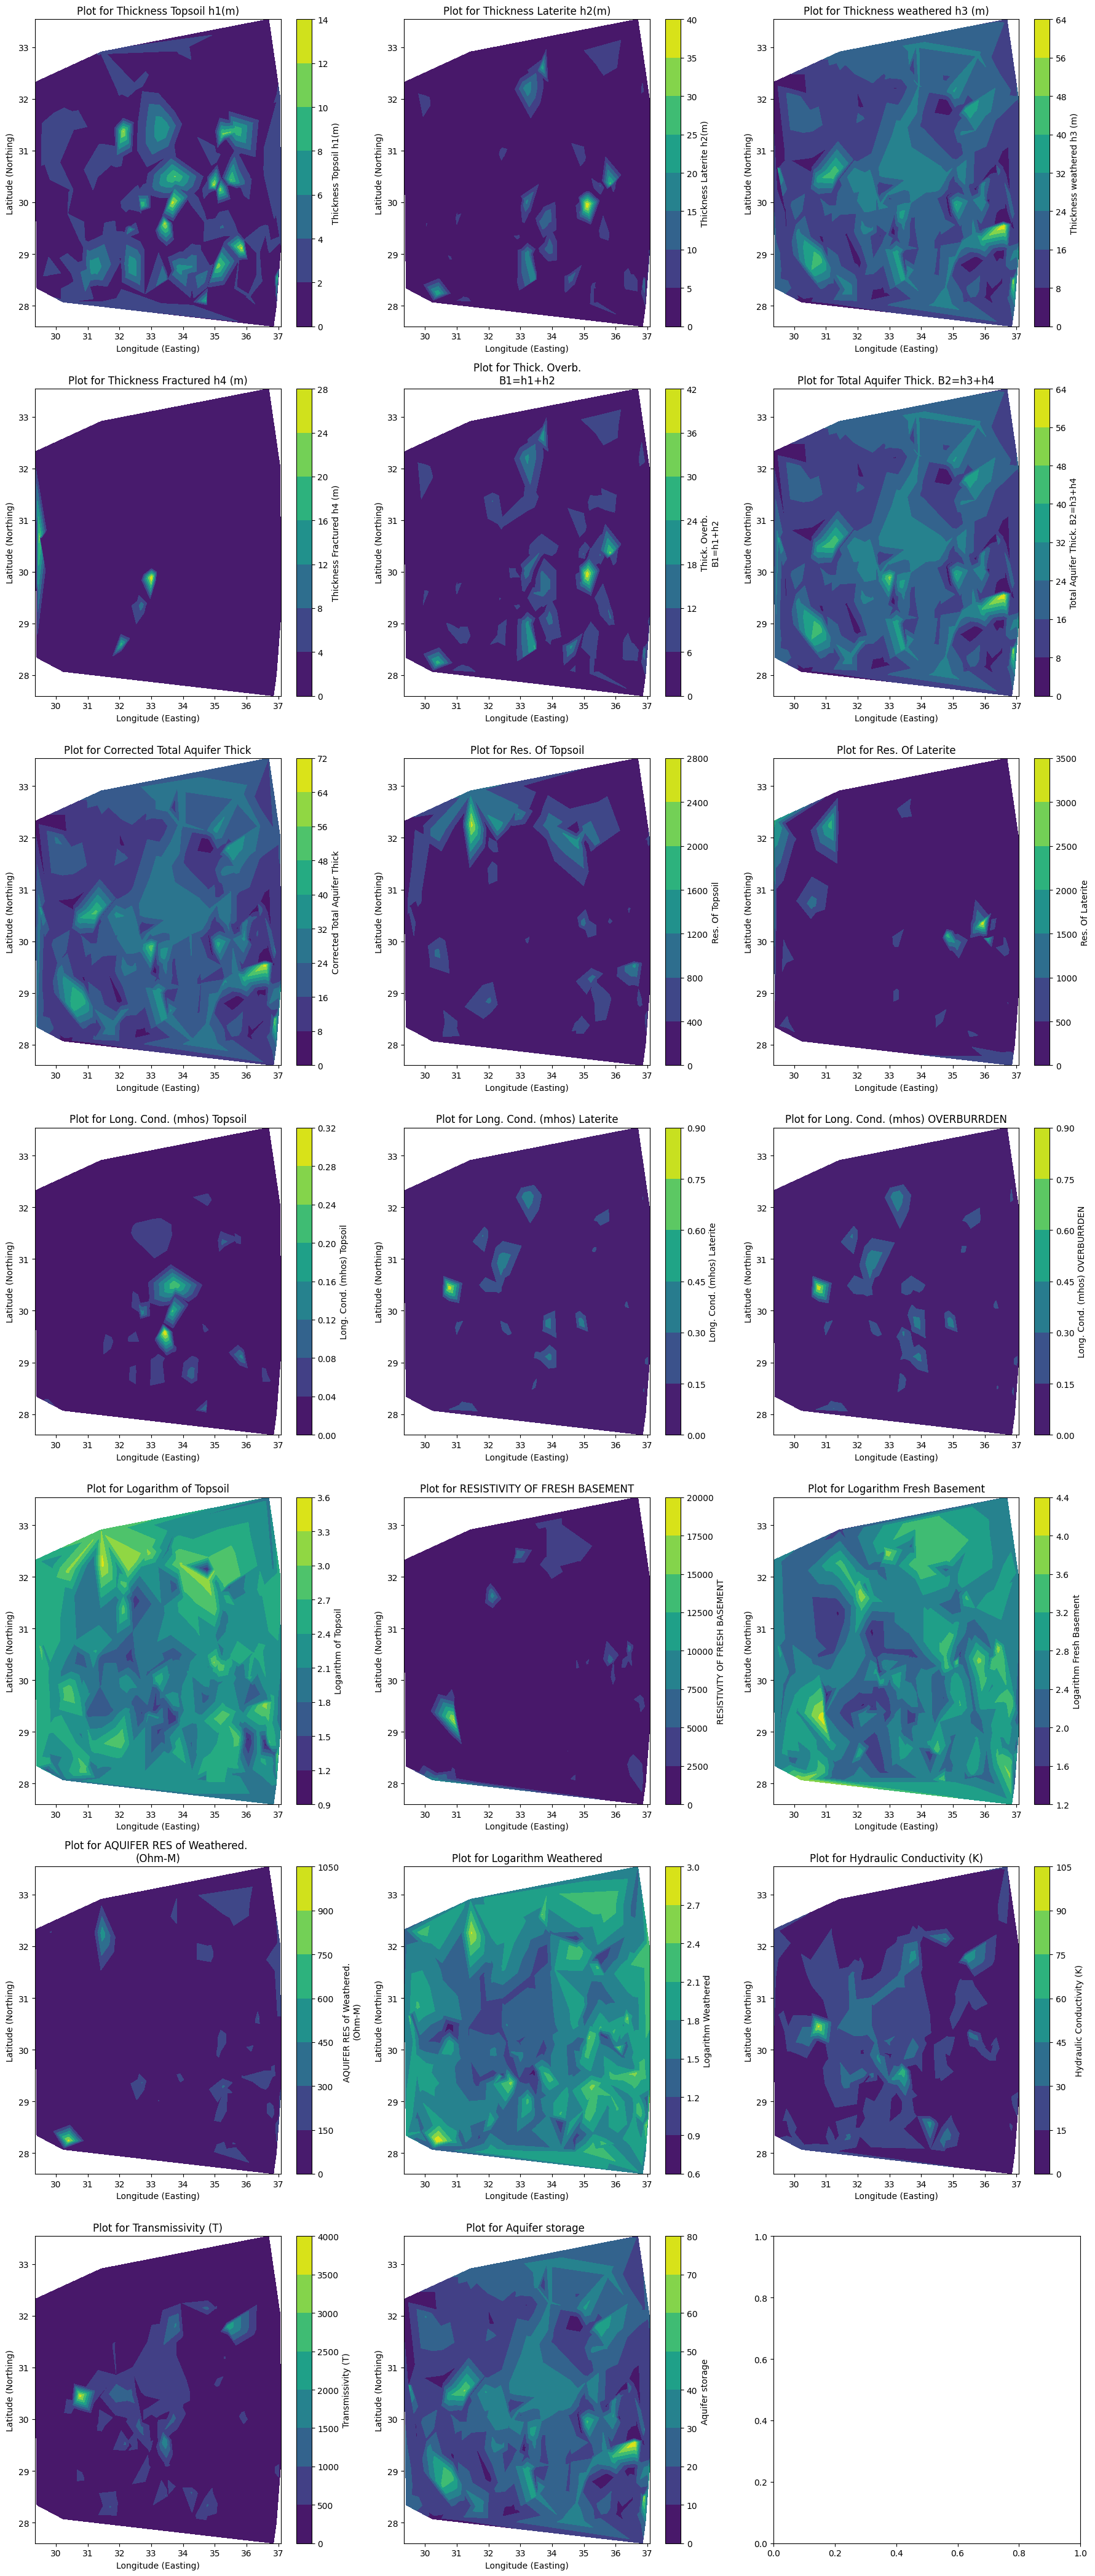

In [12]:
# Plot the raw features 
plot_features(df_1, cols_to_plot, False)

one way to better identify patterns in the data would be to scale the features to be compared. The standard scalar method is used to scale the features for this plot. It Standardize features by removing the mean and scaling to unit variance.(centers the data around a mean of 0 and scales it to have a standard deviation of 1 )

steps 

make plots 

Make plots scaled 

find the most important features 

transform features for ML 

perform ML 

3. Evaluate Algorithms.
4. Improve Results.
5. Present Results.



## References 

- Raji, W.O., Abdulkadir, K.A. Evaluation of groundwater potential of bedrock aquifers in Geological Sheet 223 Ilorin, Nigeria, using geo-electric sounding. Appl Water Sci 10, 220 (2020). https://doi.org/10.1007/s13201-020-01303-2

